# Datos del precio de venta cliente

## Para instalar la librería: 

conda install pip

https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-pkgs.html#installing-non-conda-packages

pip3 install esiosdata (dentro del env) (pip simple si no funciona)

echo "874b2aeaf4071f8db7085e0ca6aa88ede7e2992360fc0d6ad7af625b30b9e3bf" > ~/.token_api_esios

pip install 

Generación (o actualización) del archivo local de datos de PVPC recogidos en https://www.esios.ree.es/

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from esiosdata import PVPC
from esiosdata.prettyprinting import *

pvpc_handler = PVPC()

--> NO SE LEE DB_HDF (Exception: ValueError:The file '/Users/davidcerezallanda/.esiosdata/esiospvpc.h5' is already opened, but not in read-only mode (as requested).)
--> Se procede a realizar la captura de TODOS los datos existentes:

PROCESADO DE DATOS WEB DE 1933 DÍAS
Procesado de tareas en paralelo [1->50, %=2.6]: 7.73 seg [0.1546 seg/tarea]
Procesado de tareas en paralelo [51->100, %=5.2]: 6.75 seg [0.1351 seg/tarea]
Procesado de tareas en paralelo [101->150, %=7.8]: 2.21 seg [0.0443 seg/tarea]
Procesado de tareas en paralelo [151->200, %=10.3]: 4.70 seg [0.0939 seg/tarea]


/Users/davidcerezallanda/.conda/envs/practicaspy36/lib/python3.6/site-packages/esiosdata/importpvpcdata.py:95: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  df['fecha'] = pd.DatetimeIndex(start=fecha, end=fecha + dt.timedelta(days=1, hours=-1), **params_dt)


Fichero irregular nº horas != 24: --> 26-10-2014 -> 25 medidas
Procesado de tareas en paralelo [201->250, %=12.9]: 3.85 seg [0.0771 seg/tarea]
Procesado de tareas en paralelo [251->300, %=15.5]: 4.63 seg [0.0926 seg/tarea]
Procesado de tareas en paralelo [301->350, %=18.1]: 6.61 seg [0.1323 seg/tarea]
Fichero irregular nº horas != 24: --> 29-03-2015 -> 23 medidas
Procesado de tareas en paralelo [351->400, %=20.7]: 5.99 seg [0.1199 seg/tarea]
Procesado de tareas en paralelo [401->450, %=23.3]: 6.84 seg [0.1369 seg/tarea]
Procesado de tareas en paralelo [451->500, %=25.9]: 6.73 seg [0.1345 seg/tarea]
Procesado de tareas en paralelo [501->550, %=28.5]: 3.48 seg [0.0696 seg/tarea]
Fichero irregular nº horas != 24: --> 25-10-2015 -> 25 medidas
Procesado de tareas en paralelo [551->600, %=31.0]: 9.34 seg [0.1868 seg/tarea]
Procesado de tareas en paralelo [601->650, %=33.6]: 5.15 seg [0.1031 seg/tarea]
Procesado de tareas en paralelo [651->700, %=36.2]: 6.39 seg [0.1278 seg/tarea]
Fichero irr

#### Información sobre el archivo local de datos de PVPC:

In [8]:
ts_last, nrows_tot = pvpc_handler.last_entry()
print_cyan('TS LAST VALUE: {}; TOTAL VALUES: {}'.format(ts_last, nrows_tot))

df_pvpc = pvpc_handler.data['data']

print_red('Últimos valores:\n{}'.format(df_pvpc[pvpc_handler.tarifas].tail(24)))

df_pvpc = df_pvpc[pvpc_handler.tarifas]
df_pvpc.to_csv('data_alone.csv')

TS LAST VALUE: 2019-07-16 23:00:00+02:00; TOTAL VALUES: 46392
Últimos valores:
                              GEN     NOC     VHC
fecha                                            
2019-07-16 00:00:00+02:00  115.13   66.49   70.06
2019-07-16 01:00:00+02:00  109.65   61.15   58.34
2019-07-16 02:00:00+02:00  105.53   57.17   54.40
2019-07-16 03:00:00+02:00  104.49   56.17   53.42
2019-07-16 04:00:00+02:00  104.67   56.34   53.63
2019-07-16 05:00:00+02:00  106.16   57.84   55.10
2019-07-16 06:00:00+02:00  107.07   58.83   56.12
2019-07-16 07:00:00+02:00  111.32   62.94   66.22
2019-07-16 08:00:00+02:00  112.83   64.92   67.85
2019-07-16 09:00:00+02:00  115.51   67.55   70.50
2019-07-16 10:00:00+02:00  114.76   66.87   69.81
2019-07-16 11:00:00+02:00  115.35   67.38   70.33
2019-07-16 12:00:00+02:00  116.52   68.51   71.55
2019-07-16 13:00:00+02:00  117.53  136.14  136.14
2019-07-16 14:00:00+02:00  116.45  135.05  135.05
2019-07-16 15:00:00+02:00  114.91  133.56  133.56
2019-07-16 16:00:00+0

### Resúmenes diarios y mensuales:

In [41]:
pvpc_mean_daily, pvpc_mean_monthly = pvpc_handler.get_resample_data()
print_yellow(pvpc_mean_daily[pvpc_handler.tarifas].tail(10))
print_magenta(pvpc_mean_monthly[pvpc_handler.tarifas].tail(10))

                                  GEN         NOC         VHC
fecha                                                        
2017-01-23 00:00:00+01:00  157.642917  135.967083  136.845000
2017-01-24 00:00:00+01:00  161.831667  140.119583  141.029167
2017-01-25 00:00:00+01:00  168.692917  146.577500  147.699167
2017-01-26 00:00:00+01:00  162.972917  141.004167  141.808750
2017-01-27 00:00:00+01:00  148.272500  126.769167  127.587500
2017-01-28 00:00:00+01:00  133.752083  112.358333  113.311667
2017-01-29 00:00:00+01:00  135.939167  114.569583  115.535000
2017-01-30 00:00:00+01:00  142.190833  120.892500  121.703750
2017-01-31 00:00:00+01:00  145.432083  124.146250  124.929583
2017-02-01 00:00:00+01:00  140.008333  118.652083  119.332917
                                  GEN         NOC         VHC
fecha                                                        
2016-05-01 00:00:00+02:00   86.920578   66.976962   67.162903
2016-06-01 00:00:00+02:00  100.247875   80.059403   80.291764
2016-07-

## Obtención directa de datos por día

Sin recurrir al archivo local, se pueden obtener los datos de PVPC en un día o un rango de días concretos descargándolos directamente de la web:

In [42]:
from esiosdata.importpvpcdata import pvpc_data_dia

data_dia = pvpc_data_dia(str_dia='2017-01-25')
print_red(data_dia[pvpc_handler.tarifas])

                              GEN     NOC     VHC
fecha                                            
2017-01-25 00:00:00+01:00  180.68  127.90  135.79
2017-01-25 01:00:00+01:00  165.76  113.58  108.60
2017-01-25 02:00:00+01:00  158.33  106.59  101.73
2017-01-25 03:00:00+01:00  155.63  103.93   99.25
2017-01-25 04:00:00+01:00  152.73  101.24   96.65
2017-01-25 05:00:00+01:00  153.49  102.06   97.51
2017-01-25 06:00:00+01:00  156.43  105.03  100.54
2017-01-25 07:00:00+01:00  172.45  120.53  127.60
2017-01-25 08:00:00+01:00  173.83  122.56  129.00
2017-01-25 09:00:00+01:00  172.59  121.68  127.72
2017-01-25 10:00:00+01:00  171.83  121.15  126.98
2017-01-25 11:00:00+01:00  170.15  119.63  125.30
2017-01-25 12:00:00+01:00  169.21  188.43  124.36
2017-01-25 13:00:00+01:00  169.73  188.95  188.95
2017-01-25 14:00:00+01:00  163.29  182.45  182.45
2017-01-25 15:00:00+01:00  161.63  180.87  180.87
2017-01-25 16:00:00+01:00  159.85  178.97  178.97
2017-01-25 17:00:00+01:00  166.28  185.47  185.47


### Plotting

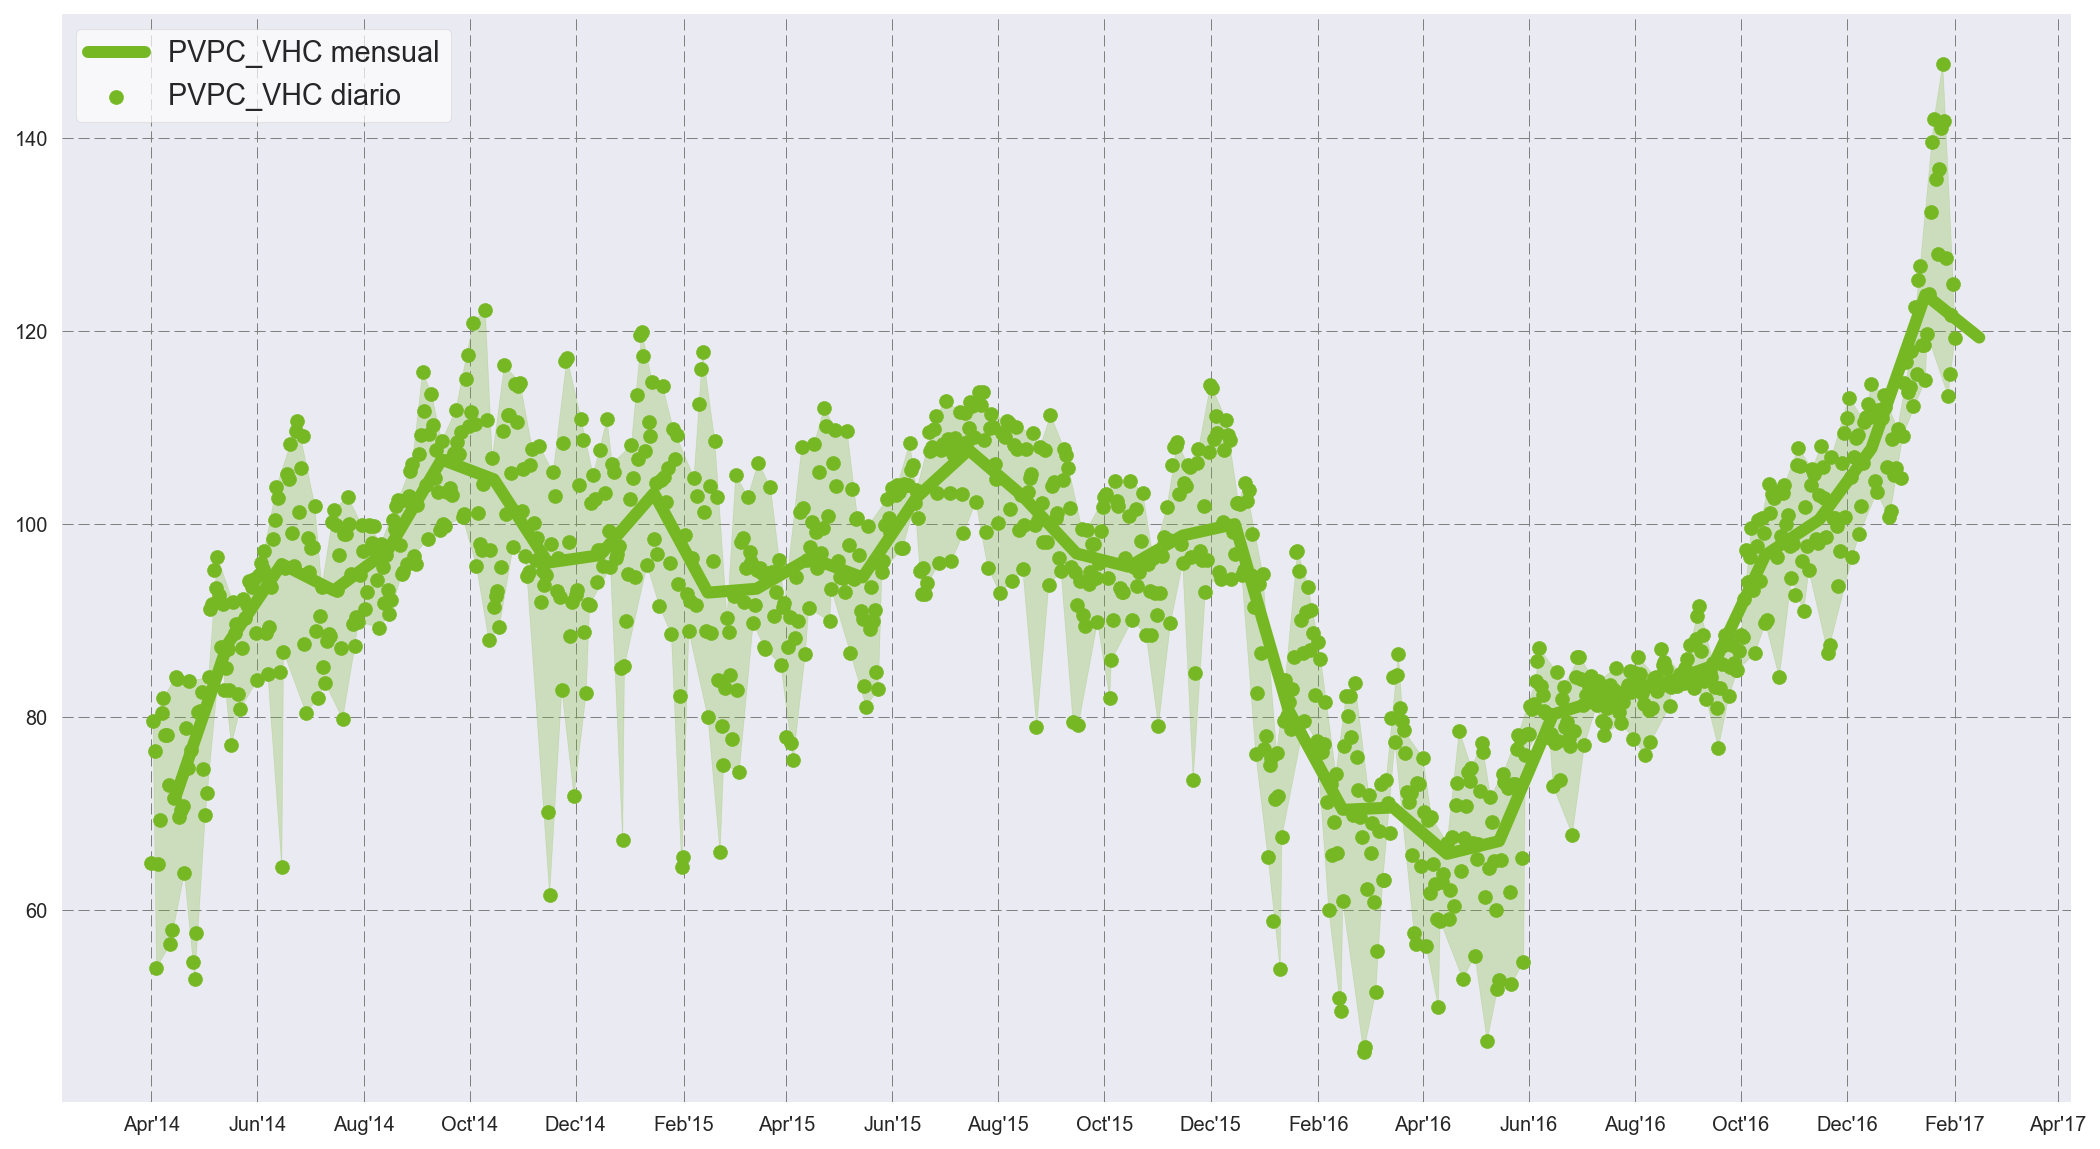

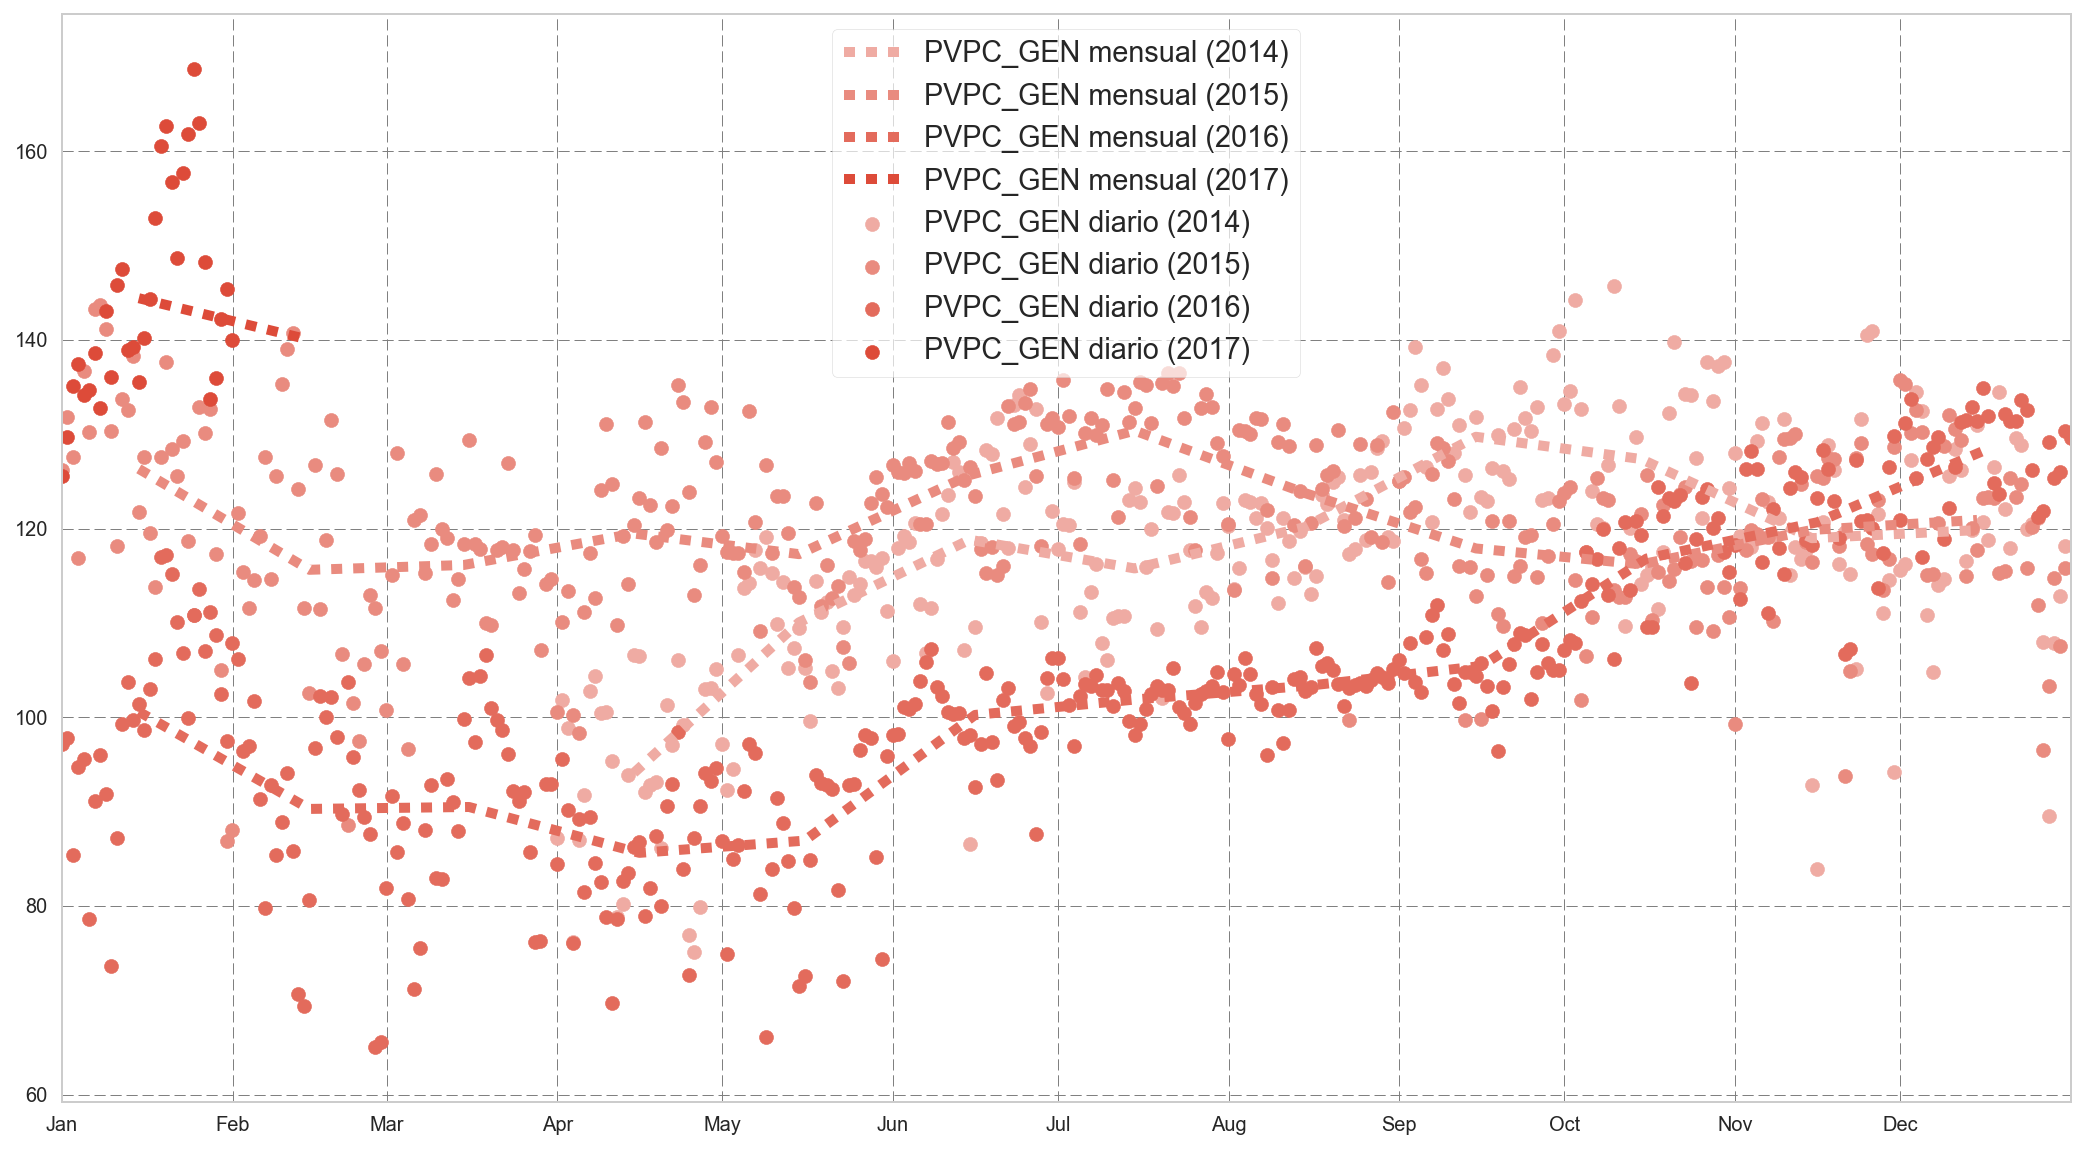

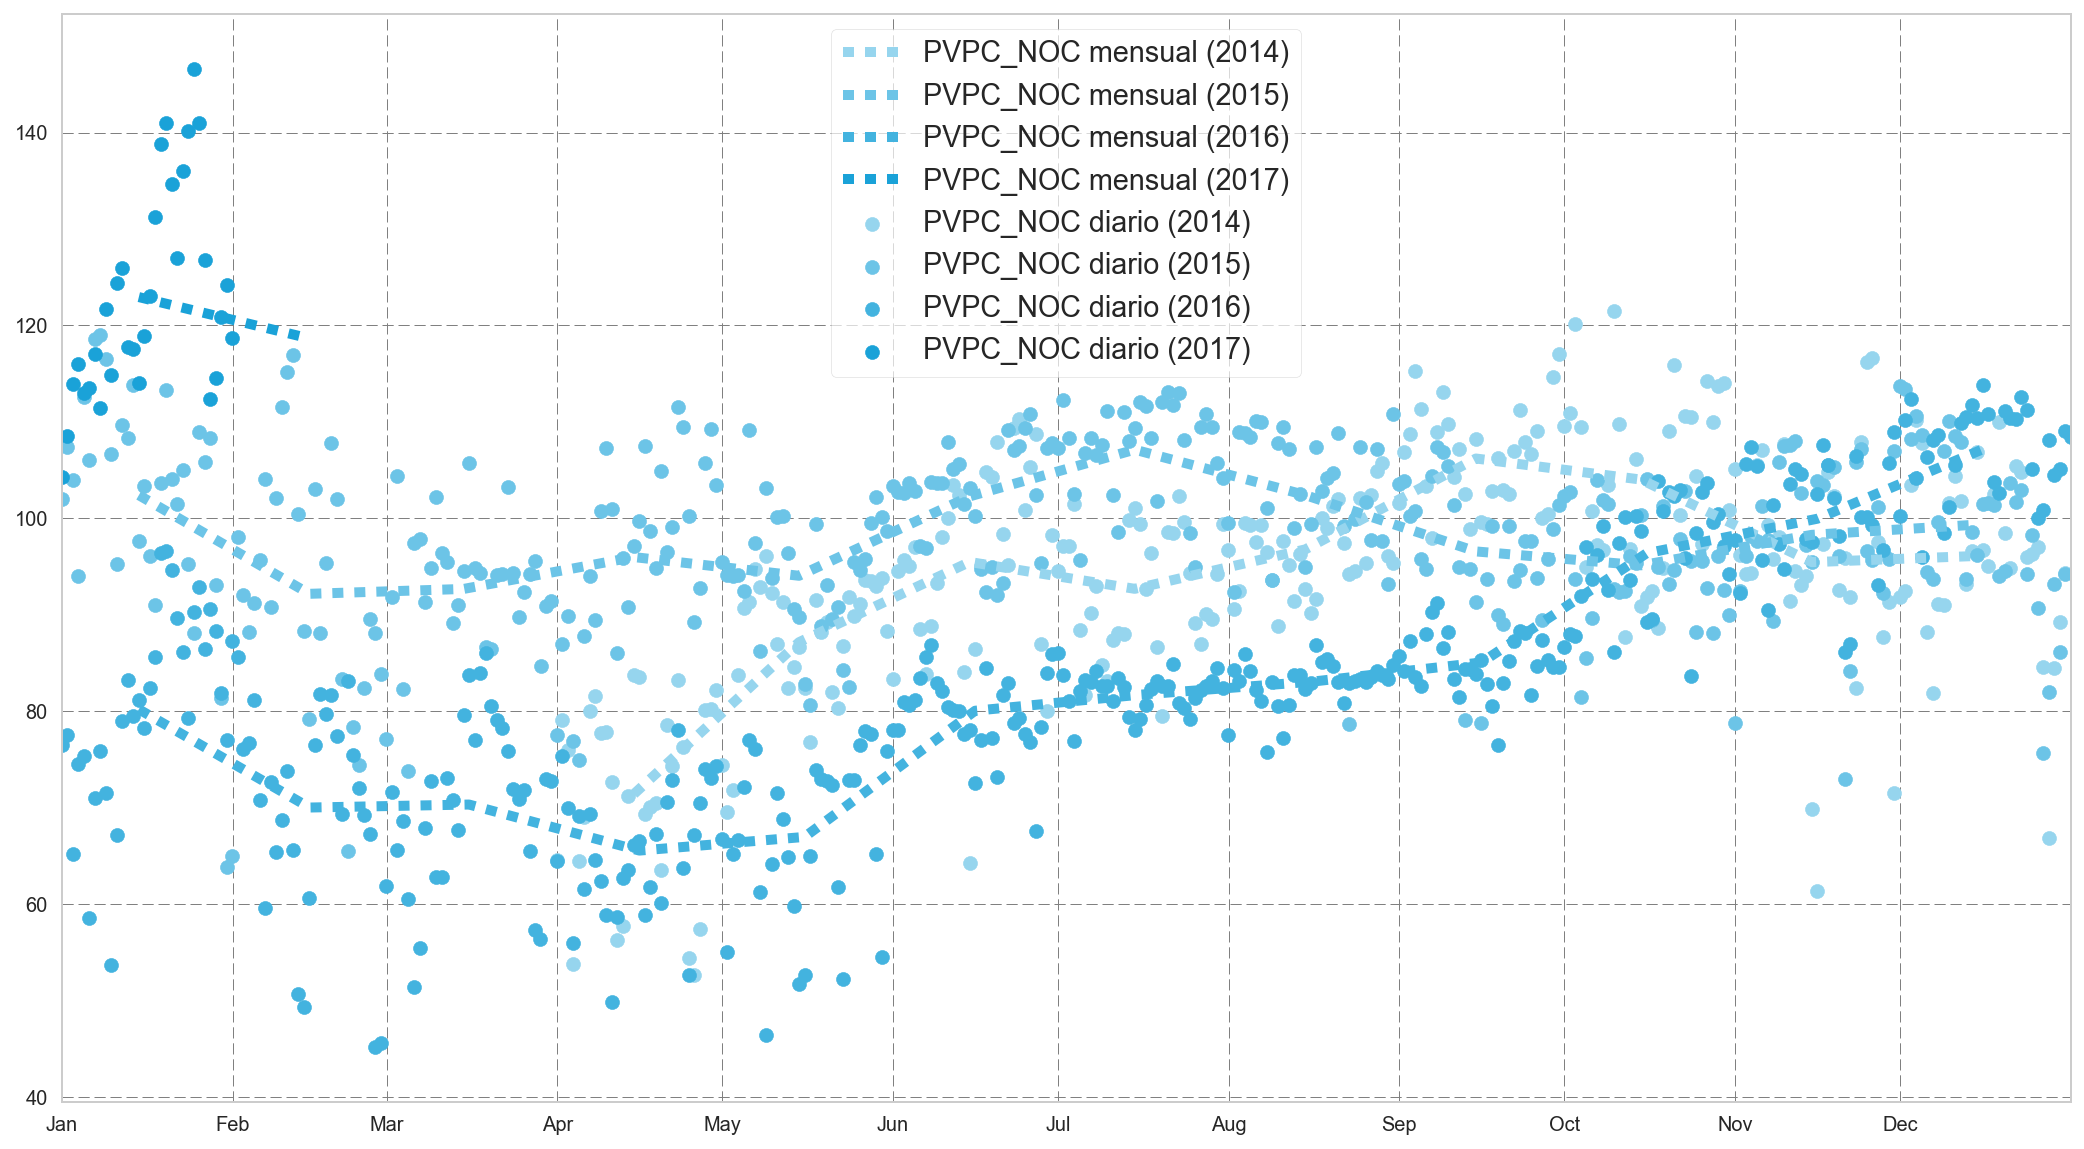

In [45]:
from esiosdata.pvpcplot import (pvpcplot_ev_scatter, pvpcplot_grid_hora, pvpcplot_tarifas_hora,
                                pvpcplot_fill_tarifa)

FIGSIZE = (16, 9)

# PLOTS EV. DIARIA Y MENSUAL:
pvpcplot_ev_scatter(pvpc_mean_daily, pvpc_mean_monthly, tarifa='GEN')
pvpcplot_ev_scatter(pvpc_mean_daily, pvpc_mean_monthly, tarifa='NOC')
pvpcplot_ev_scatter(pvpc_mean_daily, pvpc_mean_monthly, tarifa='VHC', superposic_anual=False)

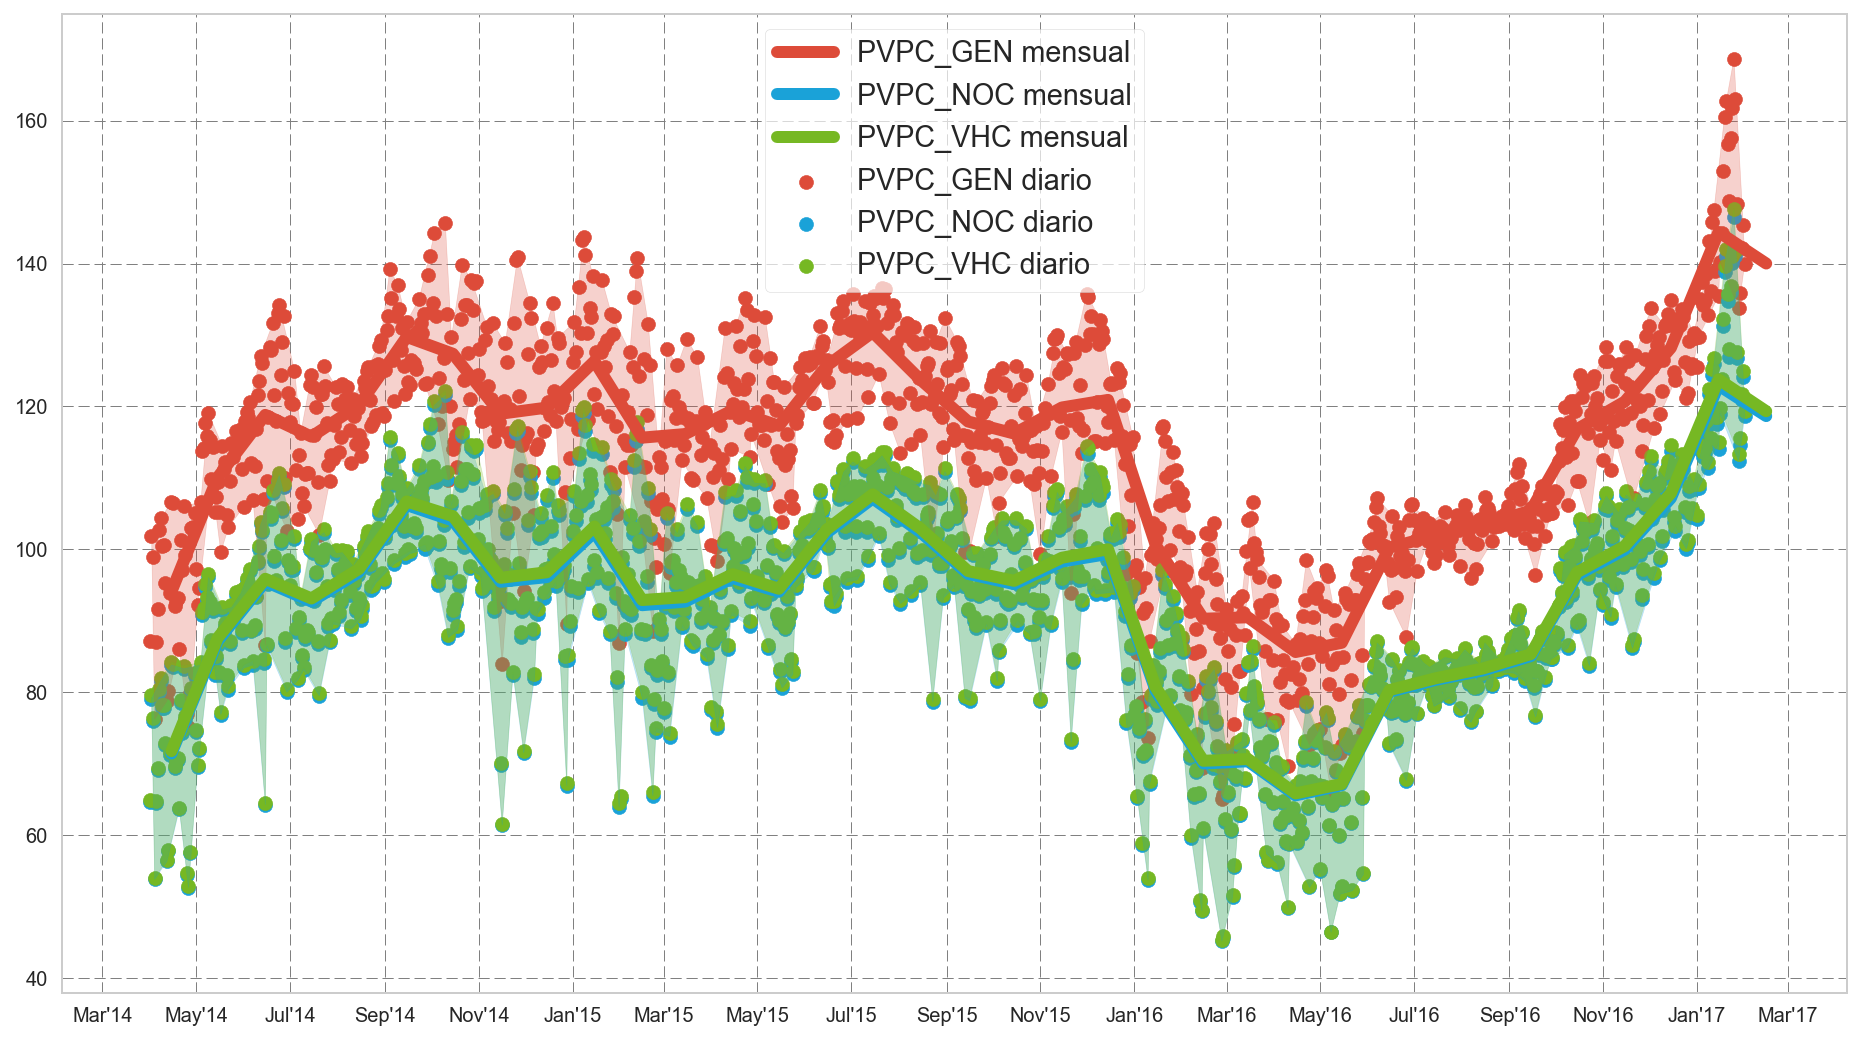

In [46]:
fig, ax = plt.subplots(figsize=FIGSIZE)
for k in pvpc_handler.tarifas:
    pvpcplot_ev_scatter(pvpc_mean_daily, pvpc_mean_monthly, tarifa=k, superposic_anual=False, ax=ax, plot=False)
plt.show()

### Plots diarios (o de intervalo horario):

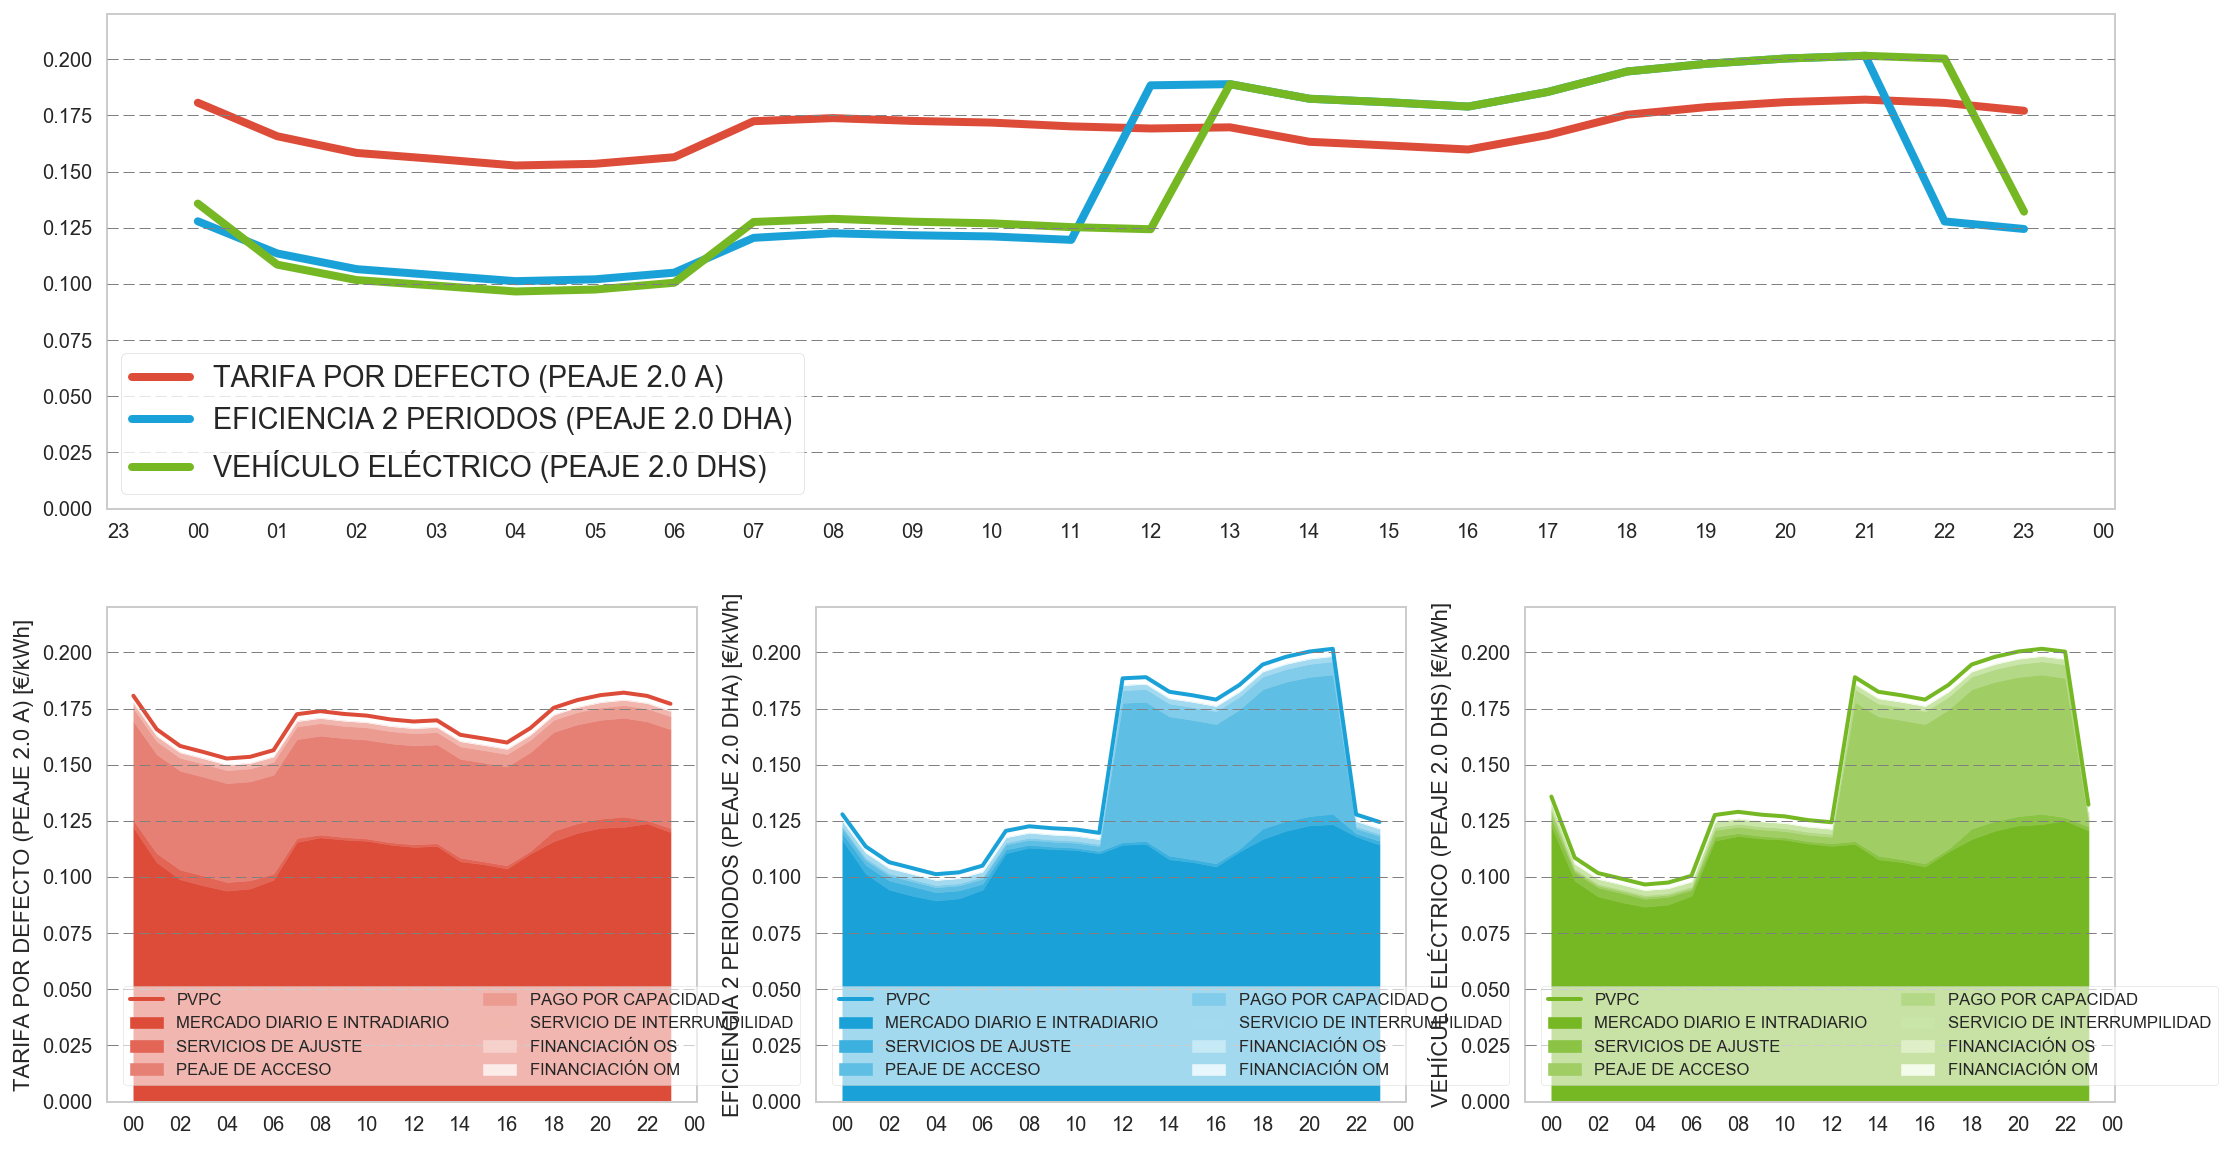

In [49]:
# PLOTS DIARIOS (O DE INTERVALO HORARIO):
df_day = df_pvpc.loc['2017-01-25']
pvpcplot_grid_hora(df_day)

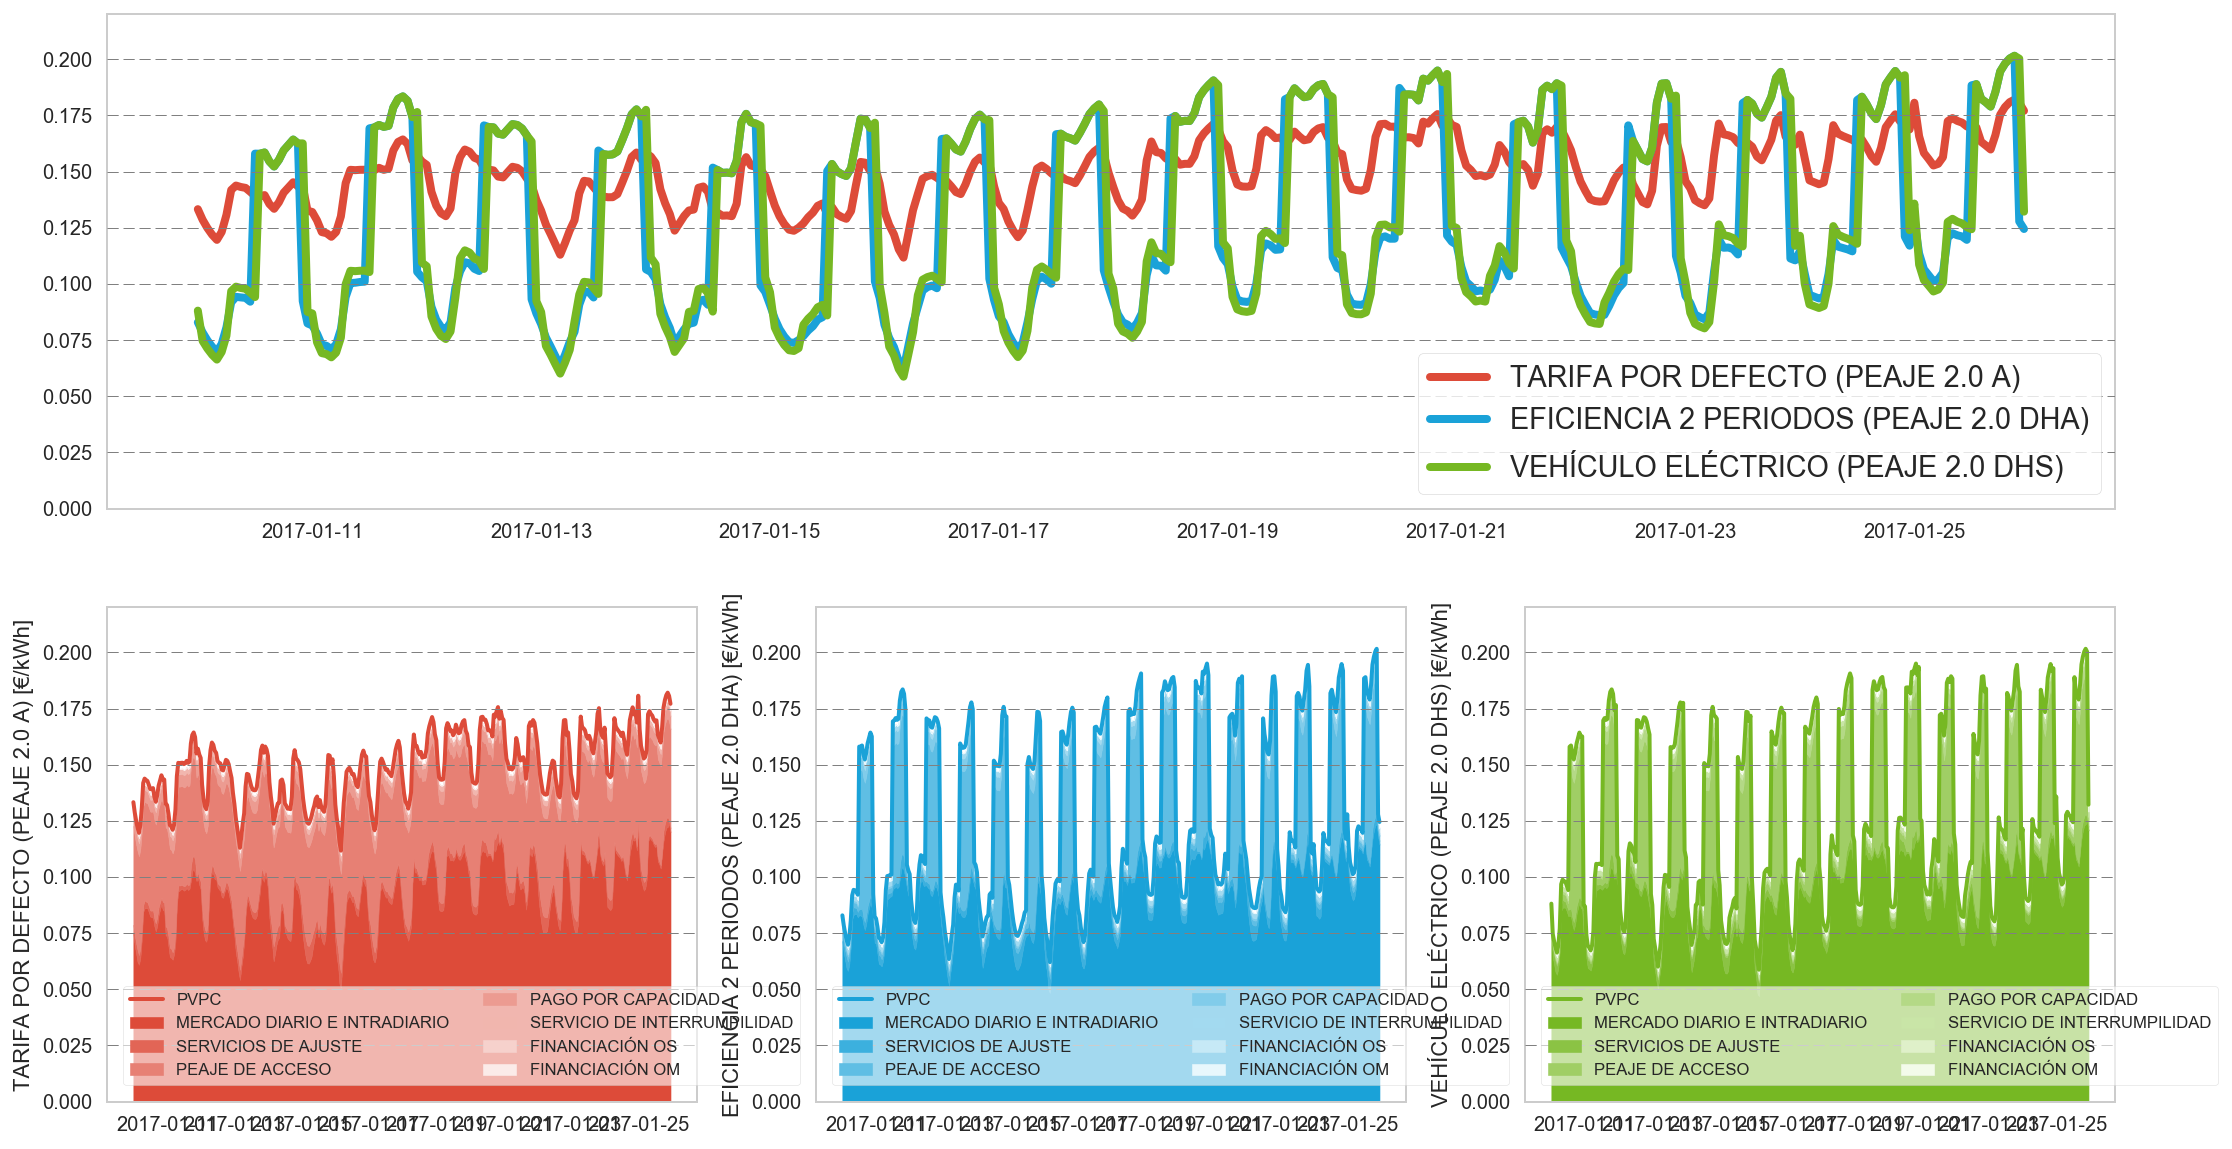

In [52]:
pvpcplot_grid_hora(df_pvpc.loc['2017-01-10':'2017-01-25'])

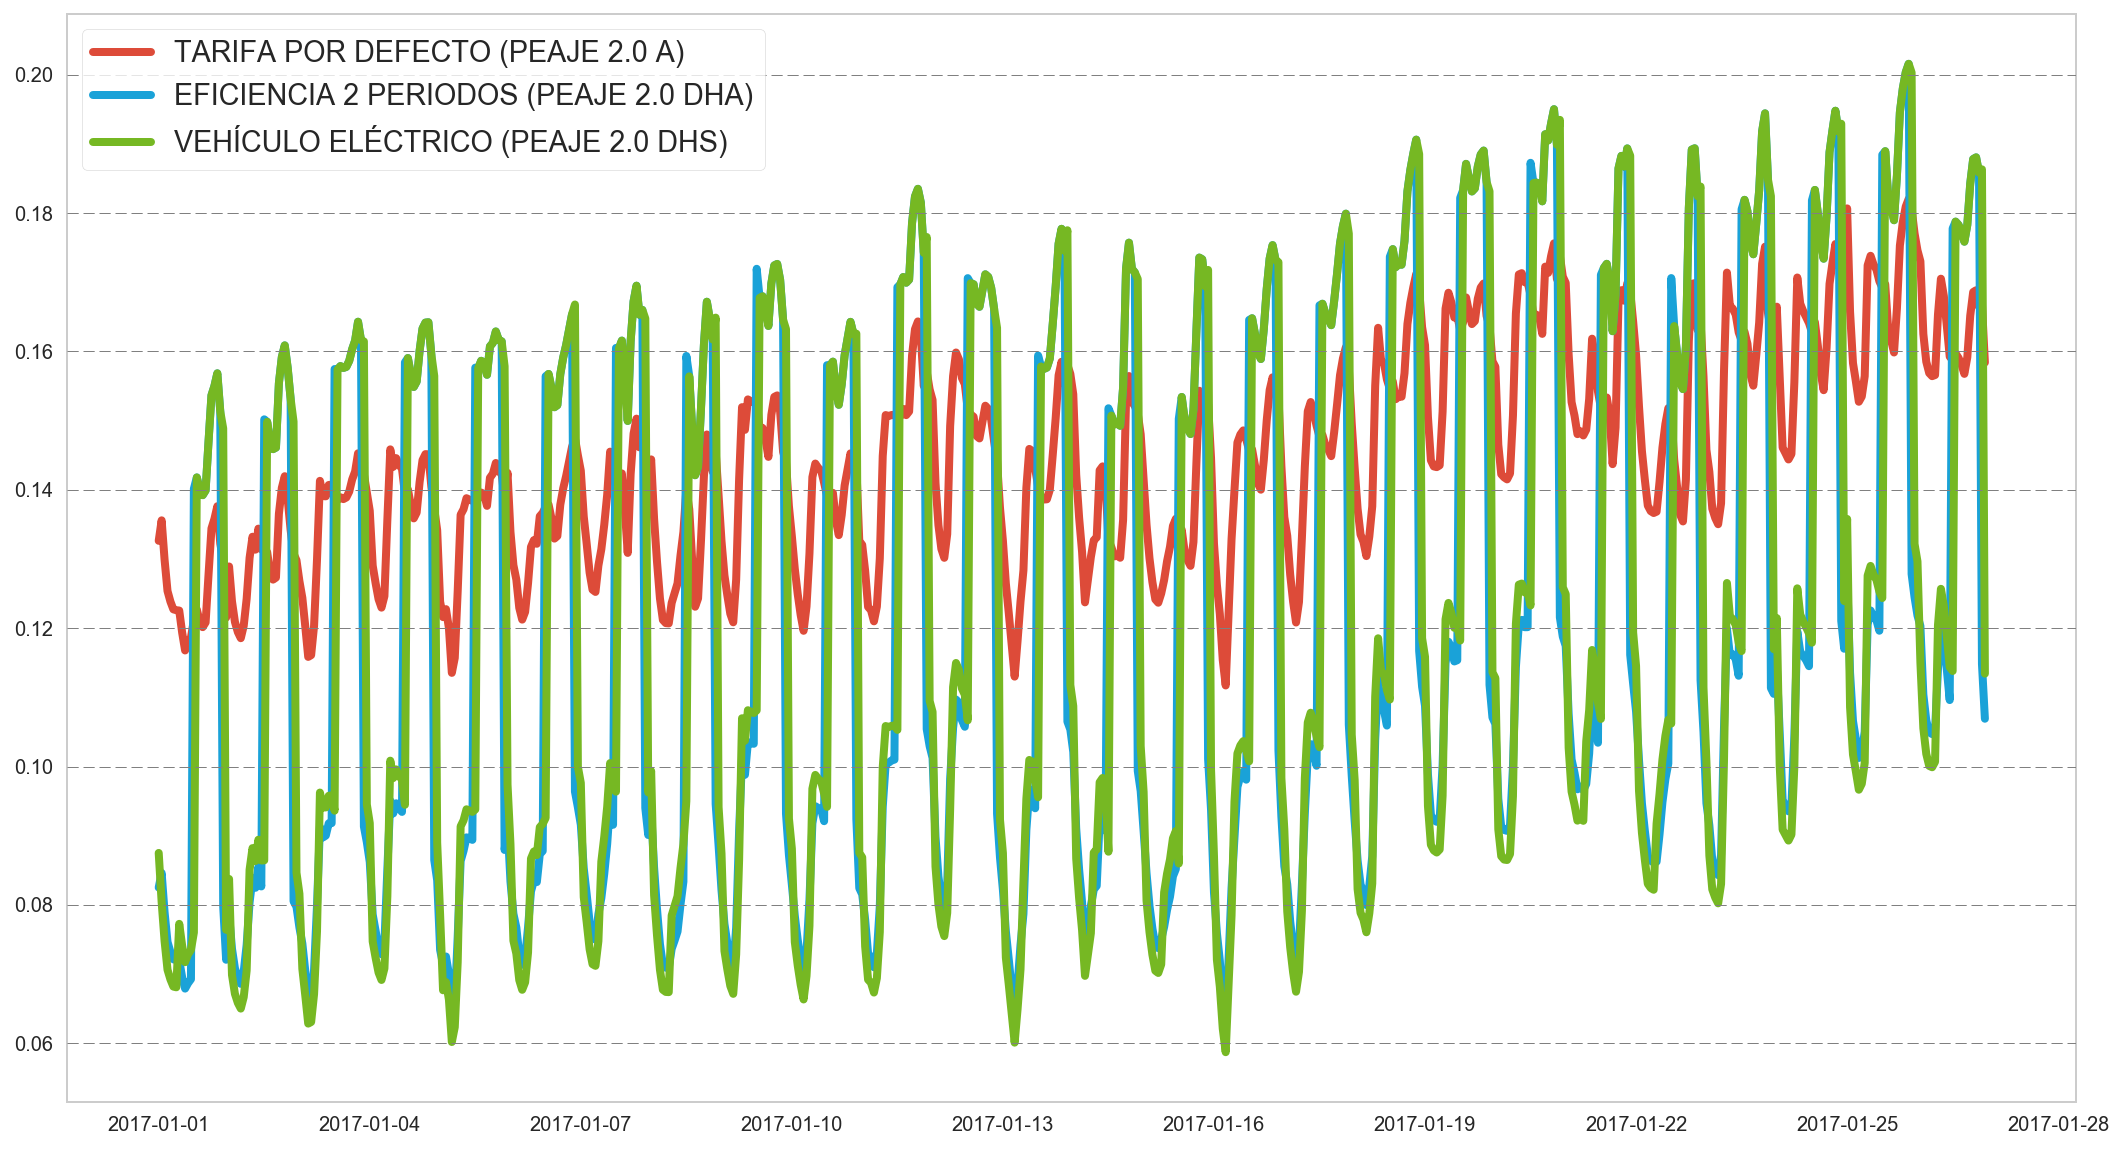

In [54]:
pvpcplot_tarifas_hora(df_pvpc.loc['2017-01-01':'2017-01-26'], plot_perdidas=False)